# Analyse de l’utilisation des différents types d’engrais (N, P et K) au Bénin au fil des années et sous différents régimes politiques.

Grâce à l'ensemble des données disponibles via l'outil FAOSTAT, j'analyserai l'utilisation engrais agricoles N,P et K au Bénin. Concrètement je répondrai aux questions suivantes : 

1- Comment évolue l’utilisation de chacun des trois engrais agricoles au fil du temps ?

2- Comment évolue les quantités d'engrais et les superficies agricoles utilisées des années 1961 à 2021 ?

3- Impact de la politique de chaque président sur l'utilisation d'engrais agricole

4- Quel régime à utiliser en moyenne le plus de terres agricoles ? 

5- Analyse de corrélation : Vérifions s’il existe une corrélation entre les différents produits.

In [1]:
# Importation des packages 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importation de la data 

df = pd.read_csv(r"D:\Notions\Projets d'analyse de données\Utilisation d'engrais agricole Bénin\Consommation - Quantité en éleménts fertilisants.csv")
df.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,RFN,Engrais par Élément Nutritif,53,Bénin,5157,Utilisation à des fins agricoles,3102,Élément nutritif azote N (total),1961,1961,tonnes,22.0,A,Chiffre officiel,Official data from questionnaire
1,RFN,Engrais par Élément Nutritif,53,Bénin,5157,Utilisation à des fins agricoles,3103,Engrais phosphatés (total d'élément fertilisan...,1961,1961,tonnes,57.0,A,Chiffre officiel,Official data from questionnaire
2,RFN,Engrais par Élément Nutritif,53,Bénin,5157,Utilisation à des fins agricoles,3104,Élément nutritif potasse K2O (total),1961,1961,tonnes,512.0,A,Chiffre officiel,Official data from questionnaire
3,RFN,Engrais par Élément Nutritif,53,Bénin,5157,Utilisation à des fins agricoles,3102,Élément nutritif azote N (total),1962,1962,tonnes,23.0,A,Chiffre officiel,Official data from questionnaire
4,RFN,Engrais par Élément Nutritif,53,Bénin,5157,Utilisation à des fins agricoles,3103,Engrais phosphatés (total d'élément fertilisan...,1962,1962,tonnes,61.0,A,Chiffre officiel,Official data from questionnaire


In [3]:
# Supprimer les colonnes non utiles à notre analyse
df.drop(["Code Domaine", "Domaine", "Code zone", "Zone", "Code Élément", "Élément", "Code Produit", "Code année", "Unité", "Symbole", "Description du Symbole", "Note"], axis = 1, inplace = True)
df.head()

,Produit,Année,Valeur
0,Élément nutritif azote N (total),1961,22.0
1,Engrais phosphatés (total d'élément fertilisan...,1961,57.0
2,Élément nutritif potasse K2O (total),1961,512.0
3,Élément nutritif azote N (total),1962,23.0
4,Engrais phosphatés (total d'élément fertilisan...,1962,61.0


In [4]:
#Vérifions l'existence des données nulles

df.isnull().sum()

Produit    0
Année      0
Valeur     0
dtype: int64

In [5]:
# Vérifions l'existence des données dupliquées

df.duplicated().sum()

0

In [6]:
# La taille de la data

df.shape

(182, 3)

In [7]:
# Les infos de la data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Produit  182 non-null    object 
 1   Année    182 non-null    int64  
 2   Valeur   182 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


In [8]:
# Remplaçons l'index par l'année

df.set_index("Année" , inplace = True)

df.head()

,Produit,Valeur
Année,,
1961,Élément nutritif azote N (total),22.0
1961,Engrais phosphatés (total d'élément fertilisan...,57.0
1961,Élément nutritif potasse K2O (total),512.0
1962,Élément nutritif azote N (total),23.0
1962,Engrais phosphatés (total d'élément fertilisan...,61.0


## 1- Comment évolue l’utilisation de chacun des trois engrais agricoles au fil du temps ?

C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

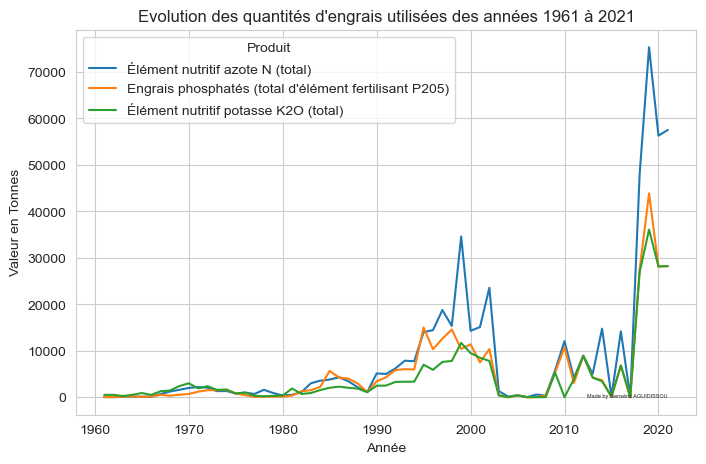

In [9]:
# Traçons la courbe illustrant cette évolution 
sns.set_style("whitegrid") 
plt.figure(figsize = (8,5)) 
sns.lineplot(data=df, x=df.index, y="Valeur", hue="Produit")
plt.title("Evolution des quantités d'engrais utilisées des années 1961 à 2021")
plt.ylabel("Année")
plt.ylabel("Valeur en Tonnes")
plt.legend(title = "Produit")
plt.text(x = df.index[-1], y = df['Valeur'].min(), s = 'Made by Genséric AGUIDISSOU', ha = 'right' , fontsize = 4)
plt.show


## 2- Comment évolue les quantités d'engrais et les superficies agricoles utilisées des années 1961 à 2021 ?

In [10]:
# Importons la data relative à l'utilisation des terres agricole Bénin

da = pd.read_csv(r"D:\Notions\Projets d'analyse de données\Utilisation des terres\Utilisation des terres agricole Bénin.csv")

da.head()


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,RL,Utilisation des terres,53,Bénin,5110,Superficie,6610,Terres agricoles,1961,1961,1000 ha,1442.0,I,Valeur imputée,NaN
1,RL,Utilisation des terres,53,Bénin,5110,Superficie,6610,Terres agricoles,1962,1962,1000 ha,1462.0,I,Valeur imputée,NaN
2,RL,Utilisation des terres,53,Bénin,5110,Superficie,6610,Terres agricoles,1963,1963,1000 ha,1482.0,I,Valeur imputée,NaN
3,RL,Utilisation des terres,53,Bénin,5110,Superficie,6610,Terres agricoles,1964,1964,1000 ha,1502.0,I,Valeur imputée,NaN
4,RL,Utilisation des terres,53,Bénin,5110,Superficie,6610,Terres agricoles,1965,1965,1000 ha,1522.0,I,Valeur imputée,NaN


In [11]:
#Supression de certaines colonnes non pertinentes pour notre analyse

da.drop(["Code Domaine", "Domaine", "Code zone", "Zone", "Code Élément", "Élément", "Code Produit", "Code année", "Unité", "Symbole", "Description du Symbole", "Note"], axis = 1, inplace = True)
print(da)

             Produit  Année   Valeur
0   Terres agricoles   1961  1442.00
1   Terres agricoles   1962  1462.00
2   Terres agricoles   1963  1482.00
3   Terres agricoles   1964  1502.00
4   Terres agricoles   1965  1522.00
..               ...    ...      ...
88     Autres terres   2019  4140.85
89  Terres agricoles   2020  3950.00
90     Autres terres   2020  4190.85
91  Terres agricoles   2021  3950.00
92     Autres terres   2021  4240.85

[93 rows x 3 columns]


In [12]:
# Supprimer les données relatives aux "Autres terres"
da = da[da['Produit'] != 'Autres terres']
da

,Produit,Année,Valeur
0,Terres agricoles,1961,1442.0
1,Terres agricoles,1962,1462.0
2,Terres agricoles,1963,1482.0
3,Terres agricoles,1964,1502.0
4,Terres agricoles,1965,1522.0
...,...,...,...
83,Terres agricoles,2017,3950.0
85,Terres agricoles,2018,3950.0
87,Terres agricoles,2019,3950.0
89,Terres agricoles,2020,3950.0


In [13]:
# Vérifions si il existe des données nulles

da.isnull().sum()

Produit    0
Année      0
Valeur     0
dtype: int64

In [14]:
# Vérifions si il existe des données duppliquées

da.duplicated().sum()

0

C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

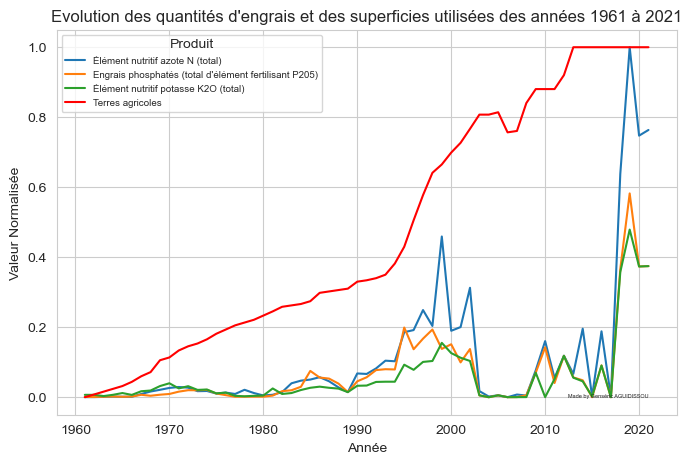

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Créer un scaler
scaler = MinMaxScaler()

# Ajuster le scaler aux données
df['Valeur_scaled'] = scaler.fit_transform(df[['Valeur']])
da['Valeur_scaled'] = scaler.fit_transform(da[['Valeur']])

# Traçons la courbe illustrant cette évolution 
sns.set_style("whitegrid") 
plt.figure(figsize = (8,5)) 
sns.lineplot(data=df, x=df.index, y="Valeur_scaled", hue="Produit")
sns.lineplot(data=da, x="Année", y="Valeur_scaled", color='red', label='Terres agricoles')
plt.title("Evolution des quantités d'engrais et des superficies utilisées des années 1961 à 2021")
plt.xlabel("Année")
plt.ylabel("Valeur Normalisée")
plt.legend(title = "Produit", fontsize=7)
plt.text(x = df.index[-1], y = df['Valeur_scaled'].min(), s = 'Made by Genséric AGUIDISSOU', ha = 'right' , fontsize = 4)
plt.show()


## 3- Impact de la politique de chaque président sur l'utilisation d'engrais agricole

In [16]:
# Définissons la période correspondante pour chaque régime politique 

Pr_Nicéphore_SOGLO = df.loc[1991 : 1995]

Pr_Mathieu_KEREKOU = df.loc[1996 : 2005]

Pr_Thomas_BONI_YAYI = df.loc[2006 : 2015]

Pr_Patrice_TALON = df.loc[2016 : ]

In [17]:
# Calculons les quantités totales pour chaque produit et pour chaque régimes

sum_SOGLO = Pr_Nicéphore_SOGLO.groupby('Produit')['Valeur'].sum()
sum_KEREKOU = Pr_Mathieu_KEREKOU.groupby('Produit')['Valeur'].sum()
sum_BONI_YAYI = Pr_Thomas_BONI_YAYI.groupby('Produit')['Valeur'].sum()
sum_TALON = Pr_Patrice_TALON.groupby('Produit')['Valeur'].sum()

In [18]:
# Créer des DataFrames individuels pour chaque régime : cas des sommes
df_SOGLO = sum_SOGLO.reset_index()
df_SOGLO['Régime'] = 'Pr Nicéphore SOGLO'

df_KEREKOU = sum_KEREKOU.reset_index()
df_KEREKOU['Régime'] = 'Pr Mathieu KEREKOU'

df_BONI_YAYI = sum_BONI_YAYI.reset_index()
df_BONI_YAYI['Régime'] = 'Pr Thomas BONI YAYI'

df_TALON = sum_TALON.reset_index()
df_TALON['Régime'] = 'Pr Patrice TALON'

# Fusionnons tous les DataFrames en un seul
df_sum = pd.concat([df_SOGLO, df_KEREKOU, df_BONI_YAYI, df_TALON])

# Renommer les colonnes
df_sum.columns = ['Produit', 'Valeur', 'Régime']


In [19]:
df_sum

,Produit,Valeur,Régime
0,Engrais phosphatés (total d'élément fertilisan...,37136.00,Pr Nicéphore SOGLO
1,Élément nutritif azote N (total),40815.00,Pr Nicéphore SOGLO
2,Élément nutritif potasse K2O (total),19484.00,Pr Nicéphore SOGLO
0,Engrais phosphatés (total d'élément fertilisan...,77979.00,Pr Mathieu KEREKOU
1,Élément nutritif azote N (total),137989.00,Pr Mathieu KEREKOU
2,Élément nutritif potasse K2O (total),59620.00,Pr Mathieu KEREKOU
0,Engrais phosphatés (total d'élément fertilisan...,36354.42,Pr Thomas BONI YAYI
1,Élément nutritif azote N (total),51862.05,Pr Thomas BONI YAYI
2,Élément nutritif potasse K2O (total),25981.18,Pr Thomas BONI YAYI
0,Engrais phosphatés (total d'élément fertilisan...,134674.77,Pr Patrice TALON


In [20]:
# Arrangeons un peu les index 
df_sum = df_sum.reset_index(drop=True)


In [21]:
df_sum

,Produit,Valeur,Régime
0,Engrais phosphatés (total d'élément fertilisan...,37136.00,Pr Nicéphore SOGLO
1,Élément nutritif azote N (total),40815.00,Pr Nicéphore SOGLO
2,Élément nutritif potasse K2O (total),19484.00,Pr Nicéphore SOGLO
3,Engrais phosphatés (total d'élément fertilisan...,77979.00,Pr Mathieu KEREKOU
4,Élément nutritif azote N (total),137989.00,Pr Mathieu KEREKOU
5,Élément nutritif potasse K2O (total),59620.00,Pr Mathieu KEREKOU
6,Engrais phosphatés (total d'élément fertilisan...,36354.42,Pr Thomas BONI YAYI
7,Élément nutritif azote N (total),51862.05,Pr Thomas BONI YAYI
8,Élément nutritif potasse K2O (total),25981.18,Pr Thomas BONI YAYI
9,Engrais phosphatés (total d'élément fertilisan...,134674.77,Pr Patrice TALON


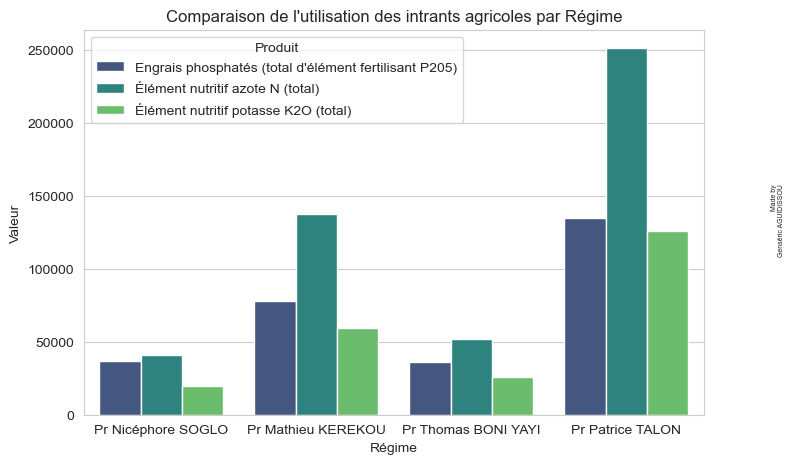

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_sum, x='Régime', y='Valeur', hue='Produit', palette='viridis')
plt.title("Comparaison de l'utilisation des intrants agricoles par Régime")
plt.text(x = 1, y = 0.5, s = 'Made by\nGenséric AGUIDISSOU', ha = 'right', va='center', rotation='vertical', transform=plt.gcf().transFigure, fontsize = 5)
plt.show()


## 4- Quel régime à utiliser en moyenne le plus de terres agricoles ? 

In [23]:
# Définissons l'année comme index
da.set_index('Année', inplace=True)

In [24]:
# Définissons les périodes pour chaque régime politique
regime_SOGLO = da.loc[1991 : 1995]
regime_KEREKOU = da.loc[1996 : 2005]
regime_BONI_YAYI = da.loc[2006 : 2015]
regime_TALON = da.loc[2016 : ]

In [25]:
# Calculons la moyenne de la valeur pour chaque régime
mean_SOGLO = regime_SOGLO['Valeur'].mean()
mean_KEREKOU = regime_KEREKOU['Valeur'].mean()
mean_BONI_YAYI = regime_BONI_YAYI['Valeur'].mean()
mean_TALON = regime_TALON['Valeur'].mean()

In [26]:
# Création d'un DataFrame pour les moyennes
da_mean = pd.DataFrame({'Régime': ['Nicéphore SOGLO', 'Mathieu KEREKOU', 'Thomas BONI YAYI', 'Patrice TALON'],
                       'Moyenne': [mean_SOGLO, mean_KEREKOU, mean_BONI_YAYI, mean_TALON]})

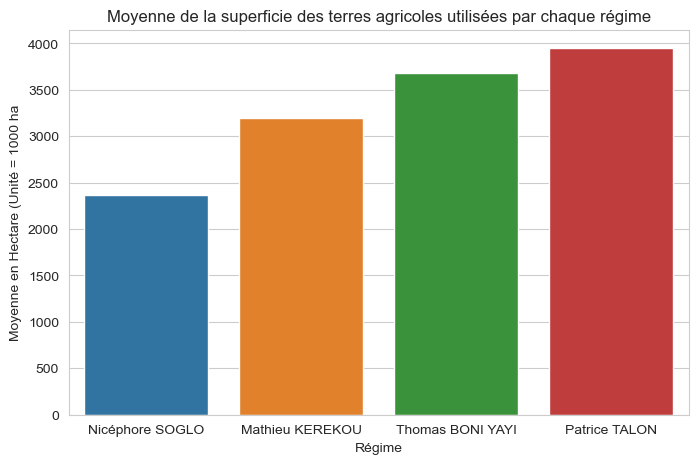

In [27]:
# Un graphique à barres pour représenter les moyennes
plt.figure(figsize=(8, 5))
sns.barplot(x='Régime', y='Moyenne', data=da_mean)
plt.title('Moyenne de la superficie des terres agricoles utilisées par chaque régime')
plt.xlabel('Régime')
plt.ylabel('Moyenne en Hectare (Unité = 1000 ha')
plt.show()

## 5- Analyse de corrélation : Vérifions s’il existe une corrélation entre les différents produits.

In [28]:
# Pivotons le DataFrame pour que chaque produit soit une colonne
df_pivot = df.pivot(columns='Produit', values='Valeur')

# Calculer la matrice de corrélation
correlation_matrix = df_pivot.corr()

print(correlation_matrix)


Produit                                             Engrais phosphatés (total d'élément fertilisant P205)  \
Produit                                                                                                     
Engrais phosphatés (total d'élément fertilisant...                                           1.000000       
Élément nutritif azote N (total)                                                             0.963444       
Élément nutritif potasse K2O (total)                                                         0.958910       

Produit                                             Élément nutritif azote N (total)  \
Produit                                                                                
Engrais phosphatés (total d'élément fertilisant...                          0.963444   
Élément nutritif azote N (total)                                            1.000000   
Élément nutritif potasse K2O (total)                                        0.975201   

Produit      

<Axes: xlabel='Produit', ylabel='Produit'>

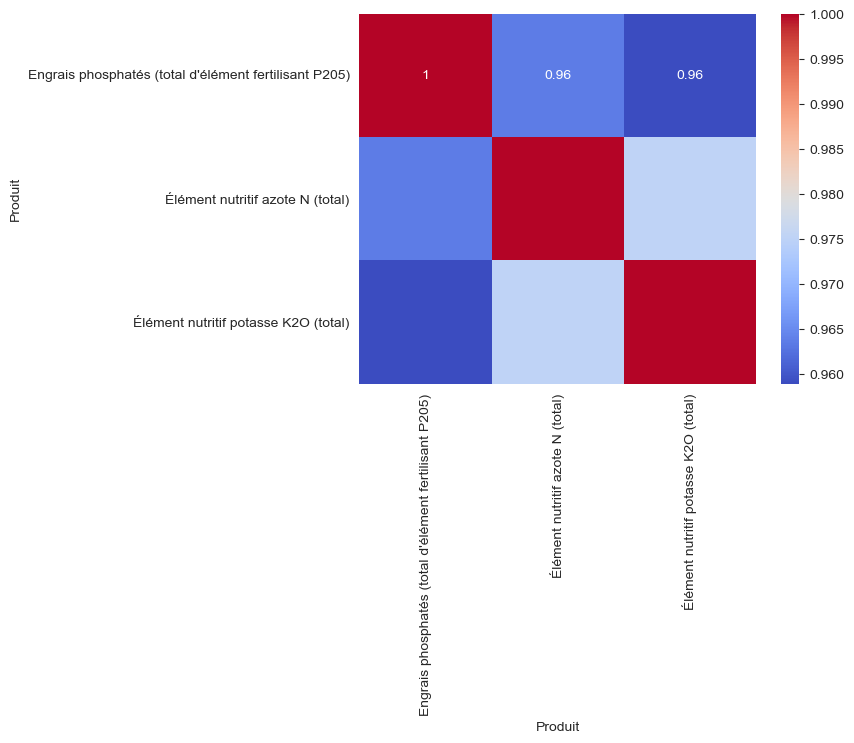

In [29]:
# Visualisons la matrice de corrélation avec une heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
